# House grouping system
We want to be able to classify houses according to their region and median income. To do this, we will use the famous California Housing dataset. It was constructed using data from the 1990 California census. It contains one row per census block group. A block group is the smallest geographic unit for which US Census data is published.

## Step 1: Loading the dataset
Be sure to conveniently split the dataset into train and test as we have seen in previous lessons. Although these sets are not used to obtain statistics, you can use them to train the unsupervised algorithm and then to make predictions about new points to predict the cluster they are associated with.
In this case, we are only interested in the Latitude, Longitude and MedInc columns.

In [2]:
import pandas as pd

data = pd.read_csv("https://raw.githubusercontent.com/4GeeksAcademy/k-means-project-tutorial/main/housing.csv")
print(data.info())

data.drop(columns=['HouseAge','AveRooms','AveBedrms','Population','AveOccup','MedHouseVal'], inplace=True)
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MedInc       20640 non-null  float64
 1   HouseAge     20640 non-null  float64
 2   AveRooms     20640 non-null  float64
 3   AveBedrms    20640 non-null  float64
 4   Population   20640 non-null  float64
 5   AveOccup     20640 non-null  float64
 6   Latitude     20640 non-null  float64
 7   Longitude    20640 non-null  float64
 8   MedHouseVal  20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   MedInc     20640 non-null  float64
 1   Latitude   20640 non-null  float64
 2   Longitude  20640 non-null  float64
dtypes: float64(3)
memory usage: 483.9 KB
None


In [3]:
from sklearn.model_selection import train_test_split

X = data
X_train, X_test = train_test_split(X, test_size = 0.2, random_state = 42)
X_train.head()

,MedInc,Latitude,Longitude
14196,3.2596,32.71,-117.03
8267,3.8125,33.77,-118.16
17445,4.1563,34.66,-120.48
14265,1.9425,32.69,-117.11
2271,3.5542,36.78,-119.80


In [4]:
X_train.to_csv("../data/processed/data_train.csv", index = False)
X_test.to_csv("../data/processed/data_test.csv", index = False)

## Step 2: Build a K-Means

Classify the data into 6 clusters using the K-Means model. Then store the cluster to which each house belongs as a new column in the dataset. You could call it cluster. To introduce it to your dataset, you may have to categorize it. See what format and values it has, and act accordingly. Plot it in a dot plot and describe what you see.

In [5]:
import numpy as np
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

# Training the model
model = KMeans(n_clusters = 6, random_state = 42)
model.fit(X_train)

KMeans(n_clusters=6, random_state=42)

In [6]:
y_train = list(model.labels_)
X_train["cluster"] = y_train
X_train.head(20)

,MedInc,Latitude,Longitude,cluster
14196,3.2596,32.71,-117.03,3
8267,3.8125,33.77,-118.16,1
17445,4.1563,34.66,-120.48,1
14265,1.9425,32.69,-117.11,3
2271,3.5542,36.78,-119.80,5
17848,6.6227,37.42,-121.86,0
6252,2.5192,34.04,-117.97,3
9389,7.9892,37.91,-122.53,0
6113,1.5000,34.13,-117.90,3
6061,6.4266,34.02,-117.79,2


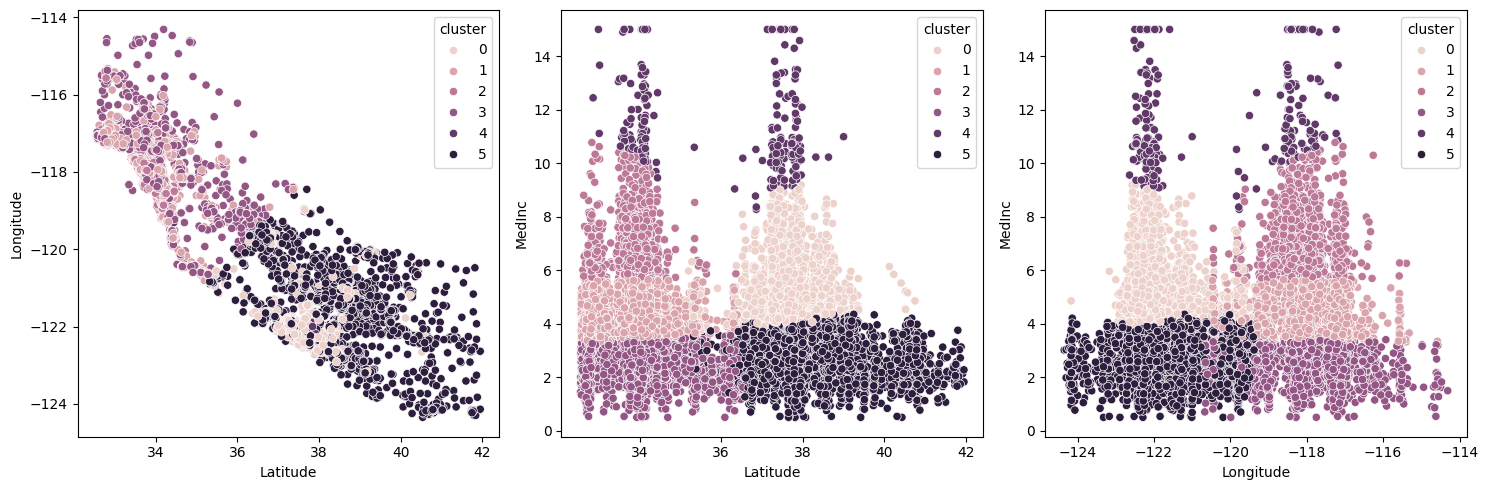

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axis = plt.subplots(1, 3, figsize = (15, 5))

sns.scatterplot(ax = axis[0], data = X_train, x = "Latitude", y = "Longitude", hue = "cluster")
sns.scatterplot(ax = axis[1], data = X_train, x = "Latitude", y = "MedInc", hue = "cluster")
sns.scatterplot(ax = axis[2], data = X_train, x = "Longitude", y = "MedInc", hue = "cluster")
plt.tight_layout()

plt.show()

## Step 3: Predict with the test set
Now use the trained model with the test set and add the points to the above plot to confirm that the prediction is successful or not.

In [8]:
y_test = list(model.predict(X_test))
X_test["cluster"] = y_test
X_test.head()

,MedInc,Latitude,Longitude,cluster
20046,1.6812,36.06,-119.01,3
3024,2.5313,35.14,-119.46,3
15663,3.4801,37.80,-122.44,5
20484,5.7376,34.28,-118.72,2
9814,3.7250,36.62,-121.93,5


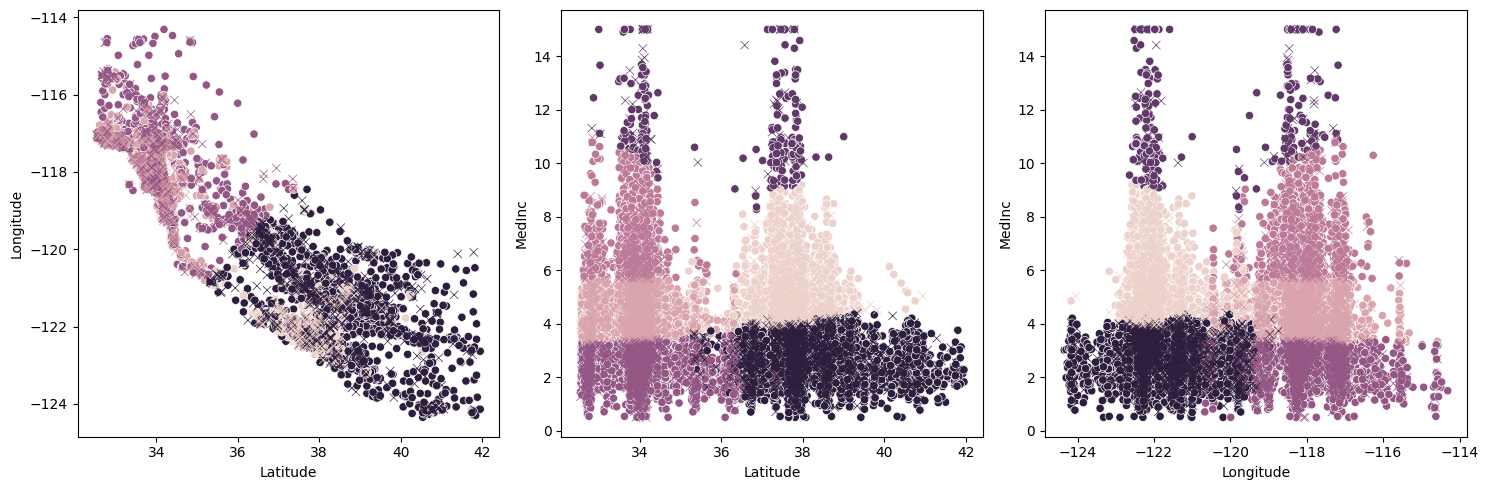

In [21]:
fig, axis = plt.subplots(1, 3, figsize = (15, 5))

sns.scatterplot(ax = axis[0], data = X_train, x = "Latitude", y = "Longitude", hue = "cluster")
sns.scatterplot(ax = axis[1], data = X_train, x = "Latitude", y = "MedInc", hue = "cluster")
sns.scatterplot(ax = axis[2], data = X_train, x = "Longitude", y = "MedInc", hue = "cluster")

sns.scatterplot(ax = axis[0], data = X_test, x = "Latitude", y = "Longitude", hue = "cluster", marker = "x")
sns.scatterplot(ax = axis[1], data = X_test, x = "Latitude", y = "MedInc", hue = "cluster", marker = "x")
sns.scatterplot(ax = axis[2], data = X_test, x = "Longitude", y = "MedInc", hue = "cluster", marker = "x")

plt.tight_layout()

for ax in axis:
    ax.legend([],[], frameon=False)

plt.show()

## Step 4: Train a supervised classification model
Now that K-Means has returned a categorization (clustering) of the points for the training and test sets, study which model might be most useful and train it. Get the statistics and describe what you see.

This flow is very common when we have unlabeled data: use an unsupervised learning model to label it automatically, and then a supervised learning model.

In [10]:
from xgboost import XGBClassifier

X_train_s = X_train[["MedInc", "Latitude", "Longitude"]]
y_train_s = X_train['cluster']
X_test_s = X_test[["MedInc", "Latitude", "Longitude"]]
y_test_s = X_test['cluster']
modelXGB = XGBClassifier(random_state = 42)
modelXGB.fit(X_train_s, y_train_s)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

In [11]:
y_pred = modelXGB.predict(X_test_s)
y_pred

array([3, 3, 5, ..., 0, 5, 1], shape=(4128,))

In [12]:
X_test

,MedInc,Latitude,Longitude,cluster
20046,1.6812,36.06,-119.01,3
3024,2.5313,35.14,-119.46,3
15663,3.4801,37.80,-122.44,5
20484,5.7376,34.28,-118.72,2
9814,3.7250,36.62,-121.93,5
...,...,...,...,...
15362,4.6050,33.36,-117.22,1
16623,2.7266,35.36,-120.83,5
18086,9.2298,37.31,-122.05,4
2144,2.7850,36.77,-119.76,5


In [13]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test_s, y_pred)

0.9941860465116279

Como se puede ver, el modelo elegido da un nivel de accuracy de 99, lo cual es bastante bueno.

## Step 5: Save the models
Store both models in the corresponding folder.

In [17]:
from pickle import dump

dump(model, open("../models/kmeans.sav", "wb"))
dump(modelXGB, open("../models/xgb.sav", "wb"))